In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS
# 这里是基于mac平台的，如果移植到了其他平台，请修改family字体
plt.rc('font', family='Arial Unicode MS', size=13)


首先让我们来看一下训练数据长得样子

In [2]:

with open('../../data/News_info_train.txt', 'r', encoding='utf-8') as f:
    line = f.readlines()[0]
print(line)

D0000001	<title>惠尔新品 | 冷色系实木多层地板系列</title> <p>  </p> <br/><p>  <span style="font-size: 16px;">冷色系实木多层系列全新上市</span></p> <br/><p>  <span style="font-size: 16px;">Cool Color Multiply Wood floor</span></p> <br/><p style="text-align: center;"><span style="font-size: 16px;">WELL FLOOR</span></p> <br/><p>  <span style="font-size: 16px;">在很多人心中,冰冷与阴暗都是冷色系家居设计的标签,因此,人们在装修的时候常常会把它拒之门外。不过近几年来,冷色系再次回归到家装界,也受到了越来越多小资人士的欢迎。冷色系家居之所以能成功逆袭,在于它独特的魅力。</span></p> <br/><p>  </p> <br/><p>  <span style="font-size: 16px;">冷色系给人一种安静、沉稳、踏实的感觉,能够营造一个宁静安详的家居氛围,让人们在喧闹的都市生活中回归到安逸愉悦的氛围中。尤其是在情绪火爆或亢奋紧张的时候,置身在冷色系的色彩氛围里,人们便会冷静下来,理智下来,让身体、大脑和心灵一同得到休息和放松。</span></p> <br/><p>  </p> <br/><p>  <span style="font-size: 16px;"><span style="font-size: 16px;">2017年,惠尔冷色系多层实木地板全新上市!</span></span></p> <br/><p>  <span style="font-size: 16px;">惠尔</span><span style="font-size: 16px;">2017</span><span style="font-size: 16px;">推出的</span><span style="font-size: 16px;">冷色系多层实木地板系列,由天然桦木材加工制成,纹理直且明显,材质结构细腻而柔和光滑,质地较软或适中。</span></p> <br/><p>

数据给出来的形式其实是原生的html格式，我们需要把这些<tag>去掉，保留成纯文本，这里直接调用官方给出的过滤html的代码

In [3]:

os.system('python2 parse_html.py ')

0

让我们来看一下经过过滤后的训练文件长什么样

In [4]:
with open('../../data/News_to_train_text.txt', 'r', encoding='utf-8') as f:
    line = f.readlines()[0]
print(line)

D0006680	【好腻害】通州这几位教师被省里选中!将派往澳大利亚、加拿大、美国学习	今天,江苏省教育厅公示	2018年雏雁培育项目选拔结果	2018年雏雁培育项目	选拔结果公示	根据《省教育厅办公室关于选拔2018年江苏英语教师雏雁培育项目培训学员的通知》(苏教师函〔2017〕14号)要求,经过资格审查和选拔考试,确定333位英语教师为2018年雏雁培育项目培训人选,其中小学英语教师170人,初中教师79人,高中教师84人。现将2018年雏雁培育项目选拔结果公示如下(见附件)。公示时间为2018年2月8日—2月14日,对选拔结果如有异议,可以通过来信、来电、来访等形式向我厅师资处反映,联系电话:025—83335953,83335968,电子信箱:teacher@jesie.org。	江苏省教育厅师资处	2018年2月8日	经过资格审查和选拔考试	确定全省333位英语教师为	2018年雏雁培育项目培训人选	咱们南通有多位老师入选	来看看有你认识的英语老师吗?	网络配图	入选老师将出国学习	什么是雏雁培育项目呢?	根据《省教育厅办公室关于选拔2018年江苏英语教师雏雁培育项目培训学员的通知》,英语教师选拔旨在进一步适应中小学英语教学改革的要求,快速提高全省中小学英语教师教学水平,促进中小学英语师资队伍建设。	2018年,全省计划选派学员300名左右(根据报名考试人数核定最终选派计划),派往澳大利亚、加拿大、美国等英语母语国家学习。派出时间拟定在2018年5月至12月。在国外培训时间为8周。	公示的南通老师名单	小学	季美洁如皋市长江镇车马湖小学	顾明媛南通市锡通园区小学	唐丽琴南通市通州区通州小学	曹洋洋如东县曹埠镇饮泉小学	曹梦茜南通市通州湾第一实验小学	褚 勇南通市锡通园区小学	葛 赟如皋市安定小学	张 昱南通市通州区川港小学	陈佳玲南通市通州区横港小学	陆 璐如东县丰利镇凌河小学	施 展南通市经济技术开发区实验小学	丛春云如东县河口镇景安小学	刘雁琳通州湾海晏小学	崔 榕海安县大公镇古贲小学	黄 伟南通市通州区平潮小学	耿家钰南通市通州区姜灶小学	初中	陈秋君南通市通州区四安中学	朱冰欣通州湾三余初级中学	姜 虹海安县白甸镇瓦甸初中	高中	秦志刚如皋市长江高级中学	贲月霞江苏省江安高级中学	邢 霞启东中学	韩佳佳海安县曲塘中学	臧华娟江苏省江安高级中学	倪婷

下面我们要对训练文件做特征提取，和数据发现

In [5]:
ORIGIN_NEWS_FILE = '../../data/News_to_train_text.txt'
ORIGIN_TEST_FILE = '../../data/News_to_test_text.txt'
ORIGIN_NEWS_PIC_LABEL = '../../data/News_pic_label_train.txt'

In [6]:
# 得到id对应的text
ID_TEXT = {}
with open(ORIGIN_NEWS_FILE, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        line = line.split('\t')
        id = line[0]
        ID_TEXT[id] = line[1:]
        
exceed_id = []
ORIGIN_LABEL_FILE = ORIGIN_NEWS_PIC_LABEL
with open(ORIGIN_LABEL_FILE, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        line = line.split('\t')
        if str(line[1]) == '1' and line[3] == 'NULL':
            exceed_id.append(line[0])

标记为0类的新闻个数有 ------->  23899 个
标记为1类的新闻个数有 ------->  7533 个
标记为2类的新闻个数有 ------->  17048 个


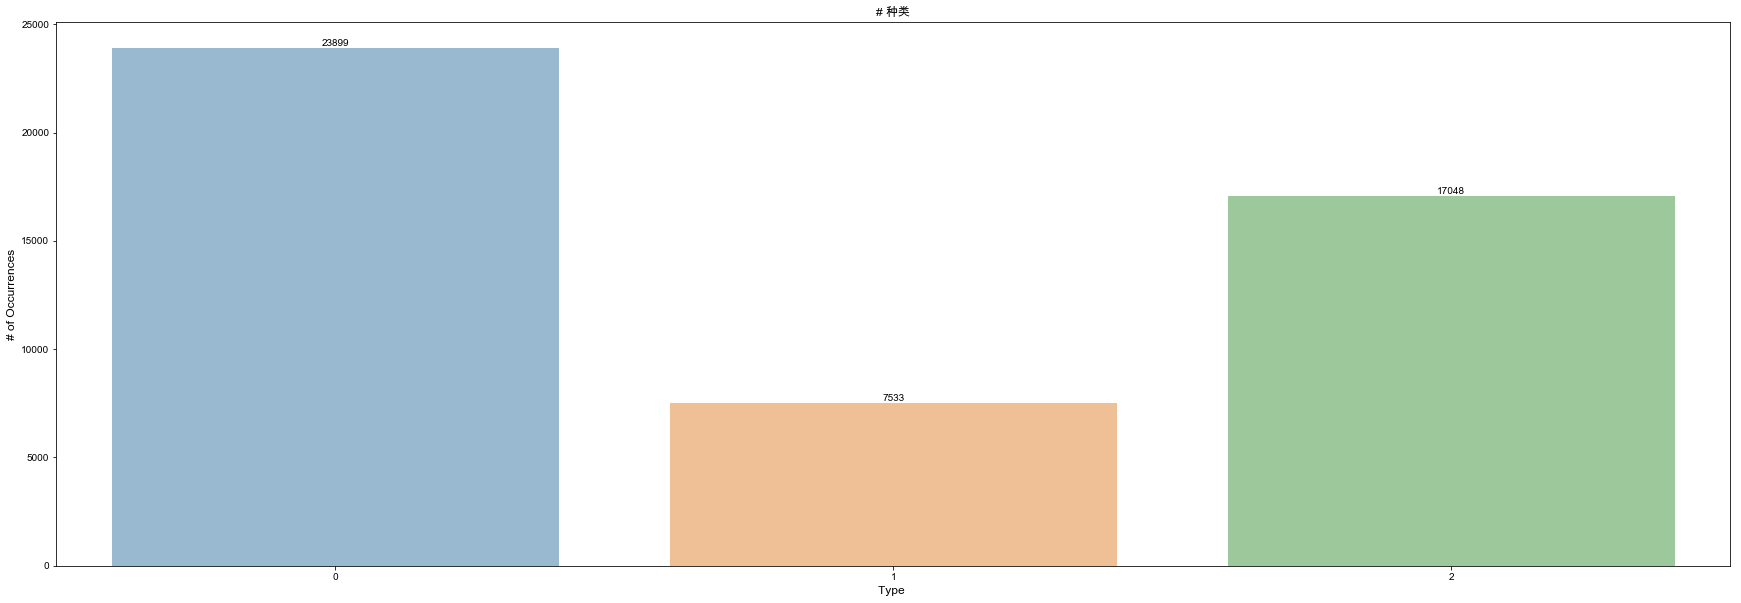

In [7]:
# 查看一下数据类别的分布
# 得到由label对应的text
ZERO_TEXT = {}
ONE_TEXT = {}
TWO_TEXT = {}
with open(ORIGIN_NEWS_PIC_LABEL, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        line = line.split('\t')
        if line[1] == '0':
            ZERO_TEXT[line[0]] = ID_TEXT[line[0]]
        elif line[1] == '1':
            ONE_TEXT[line[0]] = ID_TEXT[line[0]]
        else:
            TWO_TEXT[line[0]] = ID_TEXT[line[0]]
print('标记为0类的新闻个数有 -------> ' , len(ZERO_TEXT) , '个')
print('标记为1类的新闻个数有 -------> ' ,len(ONE_TEXT), '个')
print('标记为2类的新闻个数有 -------> ' ,len(TWO_TEXT), '个')
length = {'0':len(ZERO_TEXT),'1': len(ONE_TEXT), '2' : len(TWO_TEXT)}
plt.figure(figsize=(30,10))
ax= sns.barplot(list(length.keys()), list(length.values()), alpha=0.5)
plt.title("# 种类")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = list(length.values())


for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()



从数据分布来看，标记为1类的样本是有一定的样本失衡的

再让我们来看一下标记为1类的文本中，长出现的词有哪些

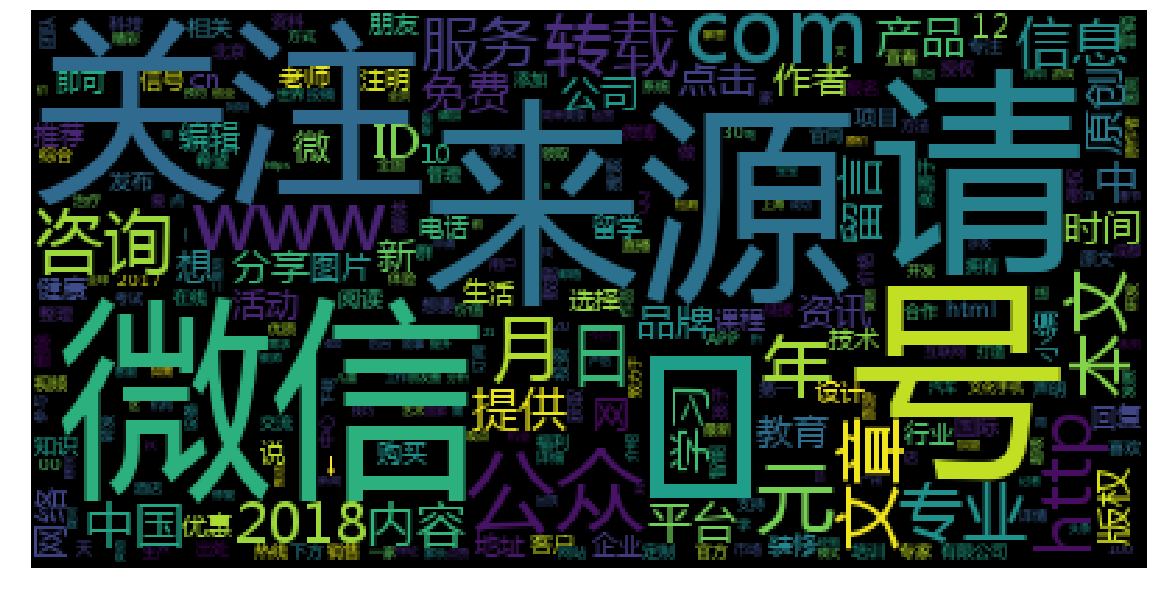

In [23]:
nagetive_text = []
with open(ORIGIN_NEWS_PIC_LABEL, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        line = line.split('\t')
        if line[1] == '1':
            if line[3] != 'NULL':
                nagetive_text.append(line[3])
                
# 加载停用词
stopword = []
with open('../../data/stopword.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        stopword.append(line)

word_seg = {}
for text in nagetive_text:
    text = jieba.cut(text, cut_all=False)
    for word in text:
        frequent = word_seg.get(word, 0)
        if word not in stopword:
            word_seg[word] = frequent + 1
wc = WordCloud(font_path="msyh.ttf", background_color="black", max_words=2000)
wc.generate_from_frequencies(word_seg)
plt.figure(figsize=(20,20))

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.imshow(wc)
# 是否显示x轴、y轴下标
plt.axis('off')
plt.show()


个别关键字还是很明显的，比如说微信好、手机号、关注、咨询等。现在我们就使用我们的特征提取代码来对每一篇新闻进行特征提取


In [25]:
os.system('python3 generate_text_feature.py News_to_train_text.txt')
os.system('python3 generate_text_feature.py News_to_test_text.txt')

0

我们可以看一下生成好的csv文件保存的特征形式，保存在特征关键字出现的频次

In [27]:
df = pd.read_csv('../../data/News_to_test_text.csv')
df.head()


,advertise_list,com_list,follow_list,free_list,from_list,give_list,id,id_list,money_list,only_list,origin_list,phone_list,public_list,qq_list,readhere_list,sale_list,sock_list,wechat_list,why_list
0,0,3,0,0,0,0,D0000035,0,0,0,0,0,0,0,0,0,7,0,3
1,0,0,1,0,0,0,D0000034,0,0,1,0,0,0,0,0,0,0,1,2
2,0,0,1,0,0,0,D0000031,0,1,0,0,0,0,0,0,0,5,0,0
3,0,0,0,0,0,0,D0000030,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,3,0,0,D0000033,0,0,1,0,0,0,0,0,0,4,0,1


接下来，我们要对原文件进行分词，训练word2vec模型。这里采用的是jieba来进行分词。由于训练word2vec需要时间，所以大家可以使用自己的word2vec文件来替换我这边的

In [39]:
os.system('python3 cut_word.py News_to_train_text.txt')
os.system('python3 cut_word.py News_to_test_text.txt')

0

让我们来看一下分好词之后的文件

In [40]:
with open('../../data/All_cut_test_text.txt', 'r') as f:
    line = f.readlines()[0]
print(line)

D0000035	 屈臣氏 买一送一 2018 年 护发 第一 弹 农历 新年 快到 妹子 美美 哒 过年 尝试 新发型 个性 瞎折腾 头发 感受 寒冷 干燥 冬天 发丝 水分 流失 毛躁 分叉 找上门来 肆无忌惮 烫 染 分 分钟 化身 毛躁 星人 发膜 一颗 冉冉升起 救星 即日起 2018 年 月 10 日 潘婷 潘婷 CLINICARE 沙宣 欧莱雅 淳萃 欧姬丝 发膜 买一送一 任配 低价 送 发膜 选 一门 大学 问 让利 君来 教 干枯 发质 深层 滋养 重塑 干燥 冬季 头皮 发根 水分 流失 妹纸 头屑 枯黄 分叉 发质 较差 情况 一款 发质 重塑 发膜 选择 HOTRECOMMEND 沙宣 修护 水养 发质 重塑 发膜 150ml 水感 修护 塑造 发质 水润 丰盈 水活 质感 配方 恢复 弹性 水润 深度 修护 受损 发质 带有 清新 花香 发梢 部位 护理 脆弱 发梢 最易 损害 敏感 发尾 干枯 易 打结 发质 选择 滋养 效果 焗油 膏 秀发 柔软 顺滑 HOTRECOMMEND 欧姬丝 摩洛哥 坚果 焗油 膏 237ml 蕴含 摩洛哥 坚果 精油 天然 滋养 成分 深层 修复 焕活 秀发 新生 轻盈 配方 令 秀发 恢复 光泽 弹性 染烫 秀发 特别 呵护 染烫 头发 脆弱 干枯 失去光泽 想要 柔顺 光泽度 饱满 秀发 一款 为染 烫 特别 定制 染 烫 损伤 修护 润 发膜 HOTRECOMMEND 潘婷 CLINICARE 染烫 损伤 修护 润 发膜 150ml 适合 染烫 受损 秀发 密集 修护 配方 受损 发丝 令 秀发 亮泽 焕如 新生 专 亚洲 发质 研创 配方 温和 适合 秋冬 护发 发膜 首选 推荐 几款 发膜 够用 喔 购买 买一送一 仙女 必备 染 护法 宝 想 美随 咯 屈臣氏 利 门店 拔草 推广 日期 即日起 2018 年 月 10 日 活动 详情 潘婷 潘婷 CLINICARE 沙宣 欧莱雅 淳萃 欧姬丝 发膜 买一送一 任配 低价 送 仅限 指定 商品 详见 店内 指示 价格 店铺 标示 为准 产品 限 店铺 销售 店铺 陈列 为准 店址 楼 125 卡	2



现在我们来提取TFIDF特征 + SVD降维

In [41]:
os.system('python3 train_tfidf.py')


256

我们利用训练好的TFIDF+SVD模型来处理我们的测试文本

In [43]:
os.system('python3 process_features.py train')
os.system('python3 process_features.py test')


0

In [ ]:
好了，现在我们就具备了训练我们模型的训练数据和测试数据了，接下来我们可以处理我们的模型了

这里再补充一下我们的OCR模型 我们来看一下标记为营销类别的图片


In [8]:
from PIL import Image
import numpy as np

In [9]:
image = np.array(Image.open('../../data/images/test.png').convert('RGB'))

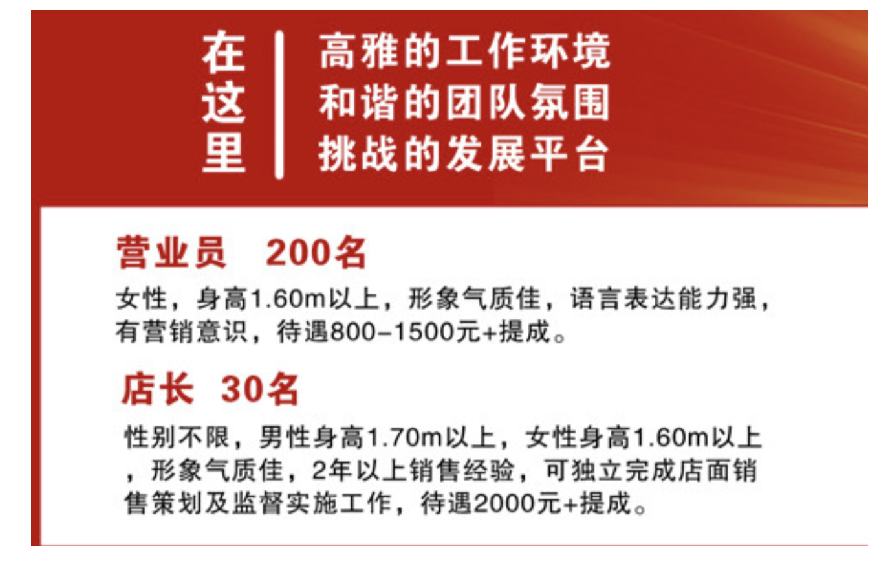

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.axis('off')
plt.show()

可以看出来图片往往是因为里面具备的文字，才具有营销意图的。正确提取图片里的文字不仅能加强图片分类的准确率，还对分类新闻有好处

In [9]:
os.system('cd ../ocr && python demo.py train')
os.system('cd ../ocr && python demo.py test')

0

让我们来看一看ocr之后的效果

In [10]:
with open('../../data/result_train_ocr.txt', 'r') as f:
    line = f.readlines()[1]
print(line)

P0000002.JPEG	高:I工a=z	问	寇	准a庭目	]·l已	200名	营业员	女性，身高1.60m以上，形象气质佳，语言表达能力强	!有营销意识，待遇800-1500元+提成。	30名	店长	}性别不限，男性身高1.70m以上，女性身高1.60m以上	形象气质佳，2年以上销售经验，可独立完成店面销	售策划及监督实施工作，待遇2000元+提成。



可以看出虽有还是有些识别不出来，但是对于一些关键词，还是效果不错的。仅靠这里的识别就可以帮助我们提高很多的精度了

来吧，剩下就是让我们整合OCR数据，符合我们训练数据的格式要求了

In [12]:
os.system('python3 ocr_features.py train')
# 需要把测试集的图片放在相应的位置然后使用
os.system('python3 ocr_features.py test')

0

接下来我们要提取OCR文本的特征和分词

In [13]:
os.system('python3 generate_text_feature.py News_ocr_train_to_text.txt')
os.system('python3 cut_word.py News_ocr_train_to_text.txt')
os.system('python3 process_features.py ocr_train')

# 需要把测试集的图片放在相应的位置然后使用
os.system('python3 generate_text_feature.py News_ocr_test_to_text.txt')
os.system('python3 cut_word.py News_ocr_test_to_text.txt')
os.system('python3 process_features.py ocr_test')


0